# Variáveis

## O que são variáveis em Python?
Em python, todas as variáveis são uma referencia a um objeto, não um objeto por sí só. No python quando você faz:
```python
x = 10
```
Ele faz duas coisas:
1. Cria um `objeto` do tipo `int` com o valor **10**;
2. Coloca o **nome** `x` apontando para o local da memória para esse `objeto`
A variável `x` é apenas um rótulo preso ao objeto. Aqui 10 é o objeto (objeto do tipo `int`) e `x` é a referência a esse objeto. Visualmente teriamos algo similar a isso:
```scss
[ objeto int(10) ]
         ↑
         x   (nome que referencia esse objeto)

```
O **número** é o `obejto` o nome (variável `x`) é a referência a esse objeto. Parece que o `x` contém `10` mas na verdade ele apenas aponta para o objeto `int(10)` armazenado no heap.
- Variáveis em Python nunca são objetos; são sempre referências
- Objetos vivem no heap; variáveis vivem no namespace

Toda definição de variável no Python possui:
- **Nome**: Que damos a um identificador;
- **Endereço**: O local da memória oned o objeto está;
- **Valor**: Valor alocado ao endereço de memória;
- **Tipo**: Tipo da dado associado ao valor
---
## O que é o *heap*
O *heap* é como um depósito de objetos no Python, é o lugar da memória onde lists, dicts, ints, ... são realmente armazenados. Quando falamos que o objeto mora no *heap* ele existe na memória, independente de quantas variáveis apontam para ele.

```txt
Heap (armazena objetos reais):
 ┌───────────────┐
 │  int(10)       │
 │  str("oi")     │
 │  [1,2,3]       │
 │  dict {...}    │
 └───────────────┘

```
O *heap* é administrado pelo `garbage collector` do Python

---
```python
x = y
```
`x` e `y` apontam para o **mesmo** obejto `10`. Isso porque objetos `int` são *Imútaveis*.
```txt
                  ┌───────────────┐
x ───────────────▶│ objeto int(10)│
                  └───────────────┘
                  ▲
                  │
y ────────────────┘

```
O objeto existe mesmo após você trocar os nomes:
```python
a = [1, 2, 3]
b = a

a = "string"

print(b)  # [1, 2, 3]
```

Podemos ver o endereço de uma variável no python usando seu `id` em memória ou este `id` em `hexadecimal (hex)`:
```python
x = 10
id(x)  # nós devolve o endereço de x
hex(id(x))  # nós devolve o endenreço em hexadecimal
```
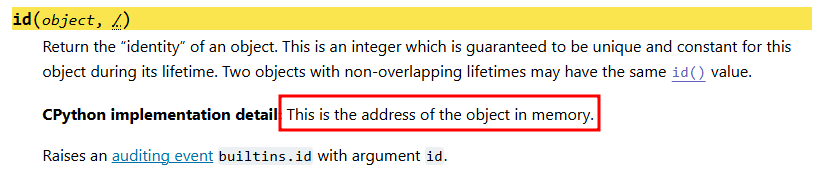

In [1]:
name = "Agent"
hex(id(name))

'0x1b47041db30'

In [2]:
name = "Smith"
hex(id(name))

'0x1b47041c240'

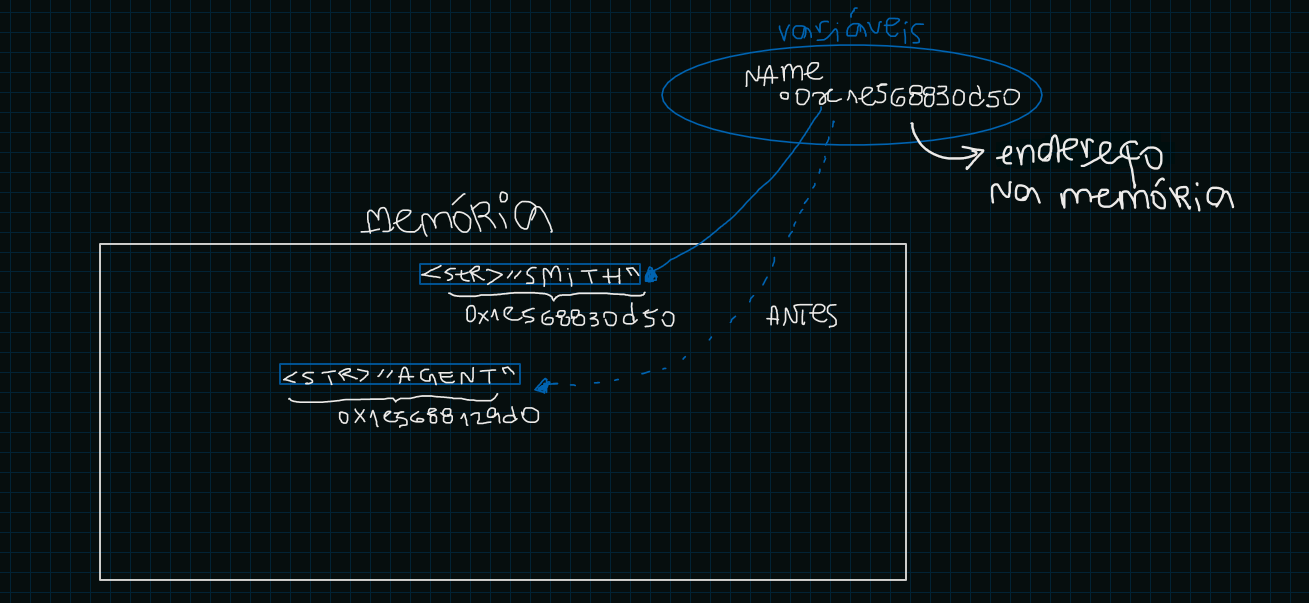

## Objetos Mutáveis e Imutávies
- `Mutable Objects`: Objetos cujo valor pode **mudar**;
- `Immutable Objects`: Objetos cujo valor **não pode mudar**

`mútavel` ou `imutável` descreve o comportamento do objeto depois de criado.

### Objeto Imutável
Depois de criado ele não pode ser mais alterado, **qualquer "mudança" gera um novo objeto no *heap***. Exemplos clássicos:
- `int`
- `float`
- `str`
- `tuple`
- `frozenset`
- `bytes`

In [3]:
x = 10
print(hex(id(x)))  # 0x7fff3adbcad8

x += 1
print(hex(id(x)))  # 0x7fff3adbcaf8

0x7fff13b5cad8
0x7fff13b5caf8


O valor `10` continua intacto no *heap*

### Objeto Mutável
Pode ser modificado internamente **sem criar um novo objeto**, o objeto é o mesmo, só muda o conteúdo. Exemplos clássicos:
- `list`
- `dict`
- `set`
- objetos customizados de classes, salvo exceções

In [4]:
lista = [1, 2, 3]
print(hex(id(lista)))  # exemplo: 0x1e56880fb40

lista.append(4)
print(hex(id(lista)))  # continua 0x1e56880fb40

0x1b4704060c0
0x1b4704060c0


O objeto é o mesmo, só mudamos o conteúdo.

Objetos mutáveis compartilham conteúdo:

In [5]:
a = [1, 2]
b = a
b.append(3)
print(a)  # [1,2,3]

[1, 2, 3]


Imutáveis não sofrem com esse comportamento:

In [6]:
x = "oi"
y = x
y = y.upper()
print(x)  # "oi"

oi


`dicts` e `sets` aceitam apenas imutáveis como chave:

In [7]:
dict_ = {(1, 2): "funciona"}

In [8]:
dict_ = {[1, 2]: "erro"}

TypeError: unhashable type: 'list'

## Em resumo:
- Objetos imutáveis: não mudam; qualquer operação cria um novo objeto.
- Objetos mutáveis: podem ser modificados sem trocar de identidade.
- Variáveis são nomes que apontam para esses objetos, mas o comportamento depende do objeto, não do nome.

## Containers
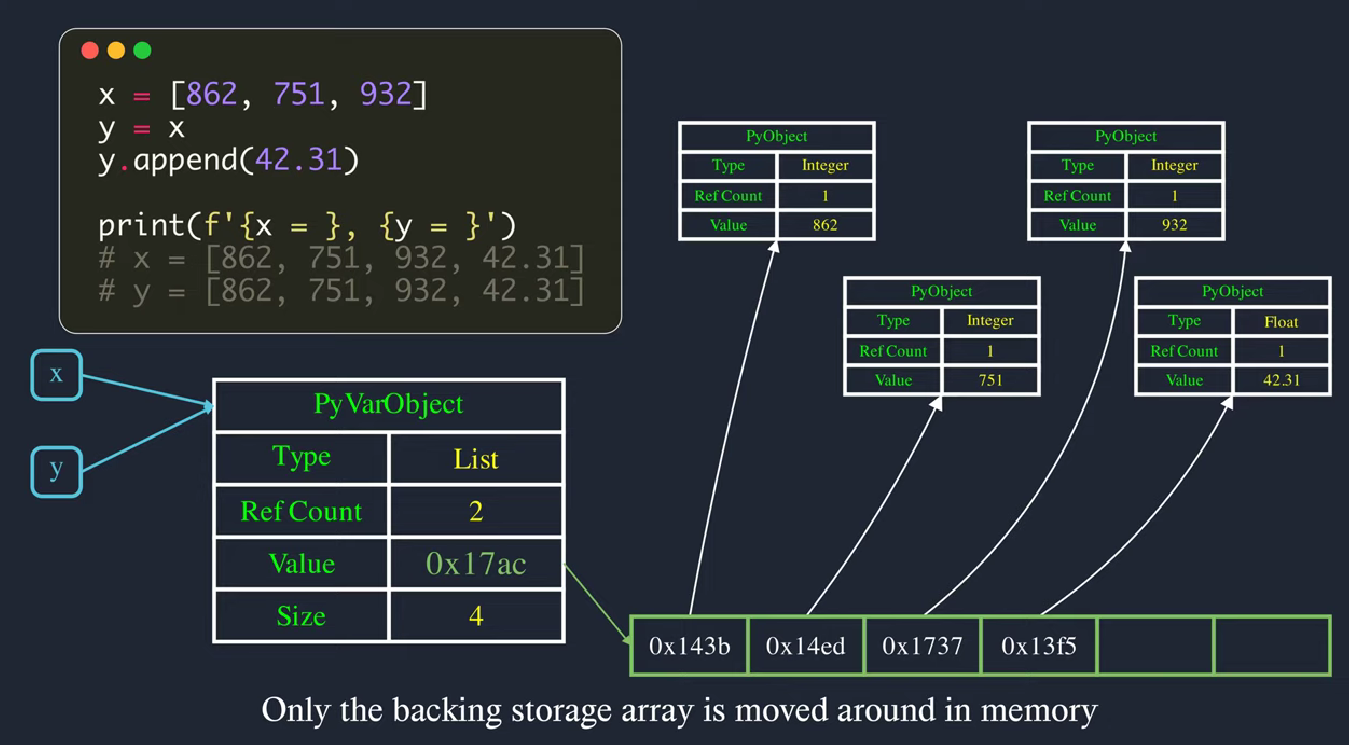

## Classes
Ao instanciar uma classe podemos ver onde ela está na memória.

In [9]:
class FooBar:
    pass

In [10]:
foobar = FooBar()
foobar

In [11]:
print(hex(id(foobar)))

0x1b47047ede0


# Namespace
TODO
- [ ] Arrume a ordem das coisas
- [ ] Releia e veja como fazer
- [ ] Comece pelo built-in e vá entrnado até o local será mais facil de entender
- [ ] explique o que é escopo antes de tudo

O `Namespace` (espaço dos nomes) no python é para onde os nomes que atribuimos a nossas variáveis vão no python para ele conseguir encontrar elas depois. 

O Python permite que você defina variáveis em diferentes lugares do seu código o Python usa o que chamamos de `LEGB` para "procurar" suas variáveis. Onde:
- `L`: Local - 1º lugar que o Python procura
- `E`: Enclosing - 2º lugar que o Python procura
- `G`: Global - 3º lugar que o Python procura
- `B`: Built-in (embutido)  - 4º lugar que o Python procura

Existe uma ordem:

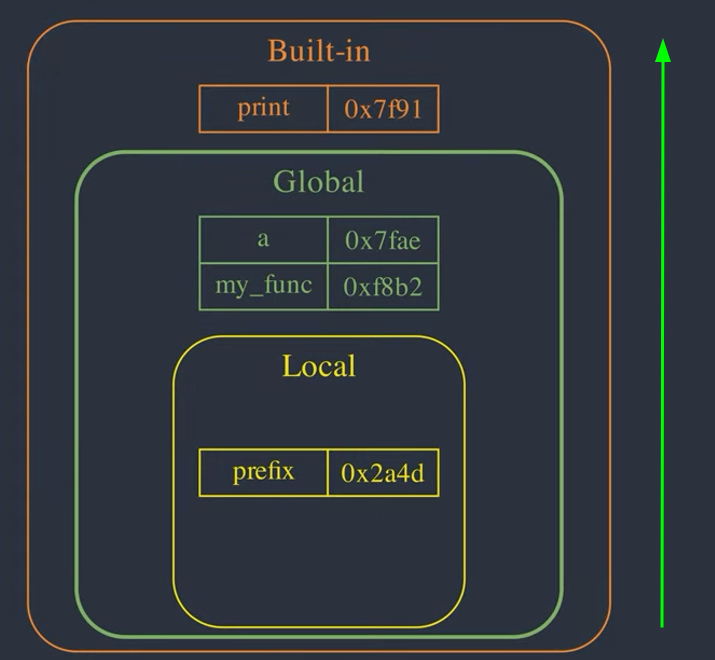

Se você fizer:
```python
def print():
    return 'Print FIXADO'
```
Isso vai sobrepor a sua função built-in `print` pois quando o Python for procurar ela função ele vai encontrar no seu `Global` e não vai precisar ir para o `Built-in` usando a função que você acabou de criar.

## Global
É o escopo de **toda** a execução, podemos ver tudo que existe no escopo global usando a função:
```python
globals()
```

In [15]:
globals()

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', 'name = "Agent"\nhex(id(name))', 'name = "Smith"\nhex(id(name))', 'x = 10\nprint(hex(id(x)))  # 0x7fff3adbcad8\n\nx += 1\nprint(hex(id(x)))  # 0x7fff3adbcaf8', 'lista = [1, 2, 3]\nprint(hex(id(lista)))  # exemplo: 0x1e56880fb40\n\nlista.append(4)\nprint(hex(id(lista)))  # continua 0x1e56880fb40', 'a = [1, 2]\nb = a\nb.append(3)\nprint(a)  # [1,2,3]', 'x = "oi"\ny = x\ny = y.upper()\nprint(x)  # "oi"', 'dict_ = {(1, 2): "funciona"}', 'dict_ = {[1, 2]: "erro"}', 'class FooBar:\n    pass', 'foobar = FooBar()\nfoobar', 'print(hex(id(foobar)))', "get_ipython().run_line_magic('pprint', '(globals())')", 'print(globals())', 'globals()', 'globals()'], '_oh': {1: '0x1b47041db30', 2: '0x1b47041c240', 10: <__main__.FooBar object at 

In [17]:
# ele é um dict
type(globals())

<class 'dict'>

In [20]:
globals().get("name")

'Smith'

In [21]:
# aqui está o nome do escopo global
globals().get("__name__")

'__main__'

In [23]:
__name__

'__main__'

In [24]:
if __name__ == "__main__":
    print("Estamos no main")

Estamos no main


## Local
É um namespace referente a nomes definidos em blocos específicos de código, algumas variáveis só existem naquele bloquinho. Um exemplo disso são funções que criam o próprio ecossistema de funcionamento delas, **localmente**, encapsulando seu funcionamento.

In [33]:
def fn():
    variavel_local = "fui criada dentro da função"
    print(f"{variavel_local=}")
    return variavel_local

In [34]:
fn()

variavel_local='fui criada dentro da função'


'fui criada dentro da função'

In [35]:
variavel_local

NameError: name 'variavel_local' is not defined

A `variavel_local` existe dentro do contexto da função e não fora dele. Podemo especionar o quais variáveis temos no `locals` igual fizemos com o `globals`
```python
locals()
```
Perceba que quando rodados `locals()` no contexto global:
```python
locals() == globals()  # retorna True
```

In [39]:
locals() == globals()

True

In [42]:
def fn():
    name = "Smith"
    age = 21
    print("Printando o que está no Locals")
    print("Locals:")
    print(locals())
    print("-" * 50)
    print(f"{locals().get('name')=}")
    print(f"{locals().get('age')=}")
    return None

O escopo `local` é *fechado* nele mesmo, naquilo que existe dentro dele. Ele é um `escopo` relativo ao local onde estamos executando o código.

In [44]:
fn()

Printando o que está no Locals
Locals:
{'name': 'Smith', 'age': 21}
--------------------------------------------------
locals().get('name')='Smith'
locals().get('age')=21


## Built-in
Aqui temos nomes criados pelo próprio python para o seu fuincionamento. `sum()`, `len()`, `print()`, `True`, `Exception`, etc...

São todos nomes criados pelo python que podemos utilizar sem precisar fazer nada de antemão.

In [48]:
type(__builtins__)

<class 'module'>

In [46]:
__builtins__.print("Olá")

Olá


In [47]:
globals().get("__builtins__").print("Olá")

Olá


In [ ]:
# podemos importar esse modulo e utiliza-lo também
import builtins

In [50]:
builtins.print("Olá")

Olá


In [52]:
# não é possivel fazer pois são palavras reservadas do Python
True = False

SyntaxError: cannot assign to True (3506996146.py, line 2)

In [1]:
# Isso da para fazer
print, len = len, print

In [2]:
print([1, 2, 3, 4])

4

In [4]:
len("Olha só")

Olha só


In [5]:
print, len = len, print

In [6]:
print("olá")
len([1, 2, 3])

olá


3

## Escopos
`Namespace` é onde o nome está armazenado, `escopo` é onde o nome é **definido**. Podemos acessar uma variável do escopo global no escopo local:

In [10]:
x = 10


def fn():
    print(x)
    return None


fn()

10


In [11]:
x = 10


def fn():
    x = 20
    print(x)
    return None


fn()
print(x)

20
10


Cada `escopo` vai conseguir enxergar as variáveis com base no `LEGB` ele procura de dentro para fora.

Dentro de um `escopo` você não pode alterar variáveis de outro escopo, você pode até olhar para elas mas não modificalas. O `escopo` no Python só permite que você modifique o que está no escopo onde você está, você não pode sair a partir do escopo local e modificar algo de um escopo acima. Mas podemos usar:
```python
global 
nonlocal

# não funciona
a = 25

def fn():
    a += 1
    return a

fn()

# funciona
a = 25

def fn():
    global a
    a += 1
    return a

fn()
```

In [26]:
a = 25

def fn():
    a += 1
    return a

fn()

UnboundLocalError: cannot access local variable 'a' where it is not associated with a value

In [28]:
a = 25

def fn():
    global a
    a += 1
    return a

fn()

26

In [29]:
x = 10
def fn():
    x = 20
    def fn_inner():
        nonlocal x
        x += 1
        return x
    return fn_inner()

fn()

21

In [30]:
x = 10
def fn():
    x = 20
    def fn_inner():
        global x
        x += 1
        return x
    return fn_inner()

fn()

11

## Enclosing
É o conceito de quando eu estou dentro de algo que também possui um `escopo`, por exemplo dentro de algo, e esse algo não é o escopo `global`. Quando isolamos no `enclosing` controlamos o efeito colateral. 

In [21]:
# escopo global
x = 10


def fn():
    # escopo enclosing
    x = 20

    def fn_inner():
        # escopo local
        return x

    return fn_inner()


fn()

20

In [22]:
# escopo global
x = 10


def fn():
    # escopo enclosing
    x = 20

    def fn_inner():
        # por qual motivo o x aparece?
        print(locals())
        # escopo local
        return x

    return fn_inner()


fn()

{'x': 20}


20

In [23]:
fn.__code__.co_freevars

()

# Garbage Collector
TODO
- [ ] Arrume tudo
- [ ] Estruture tudo
- [ ] Responda: Quando usar o gc

O Python faz a coleta do que não está mais sendo utilizado vom base na contagem de referencia, quantas vezes um objeto é refernciado por outros? Se o objeto não está sendo referenciado não precisamos mais dele e pomodes remove-lo da memória.

O Python olha a contagem de referência. o `GC` resolve problemas de ciclos que são referencias circulares
- Reference counting apaga objetos assim que ficam sem dono.
- Garbage collector caça objetos presos em ciclos.

O garbage collector roda em momentos estratégicos:
- quando muitos objetos novos são criados
- quando o limite de coleta de uma geração é atingido
- quando você chama manualmente:
```python
import gc
gc.collect()
```
O número retornado por `gc.collect()` é quantos objetos com ciclos foram desalojados da memória

In [31]:
a = 1, 2, 3
a = None
# não tem mais ninguém apontando para 1, 2, 3 ele apenas fica ocupando espaço

In [32]:
import gc
gc.collect()

3262

In [33]:
import gc
gc.collect()

0

In [34]:
class A:
    pass

a = A()
b = A()

a.ref = b
b.ref = a

del a
del b

print(gc.collect())

2


In [35]:
import gc

len(gc.get_objects())

122580